In [5]:
from pcpca import PCPCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


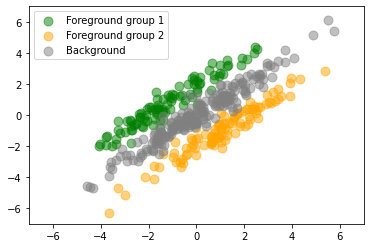

In [32]:
# Load
X = pd.read_csv("../data/toy/foreground.csv", header=None).values
Y = pd.read_csv("../data/toy/background.csv", header=None).values

# Should have same number of features
assert X.shape[0] == Y.shape[0]

p, n = X.shape
m = Y.shape[1]

# Plot
plt.scatter(X[0, :n//2], X[1, :n//2], alpha=0.5, label="Foreground group 1", s=80, color="green")
plt.scatter(X[0, n//2:], X[1, n//2:], alpha=0.5, label="Foreground group 2", s=80, color="orange")
plt.scatter(Y[0, :], Y[1, :], alpha=0.5, label="Background", s=80, color="gray")
plt.legend()
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

In [29]:
pcpca = PCPCA(gamma=5, n_components=1)
pcpca.fit(X, Y)

In [30]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

C:\Users\joelw\miniconda3\envs\jenv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


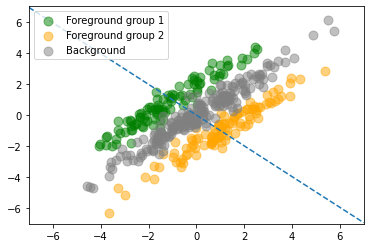

In [31]:
# Re-plot data
plt.scatter(X[0, :n//2], X[1, :n//2], alpha=0.5, label="Foreground group 1", s=80, color="green")
plt.scatter(X[0, n//2:], X[1, n//2:], alpha=0.5, label="Foreground group 2", s=80, color="orange")
plt.scatter(Y[0, :], Y[1, :], alpha=0.5, label="Background", s=80, color="gray")
plt.legend()
plt.xlim([-7, 7])
plt.ylim([-7, 7])

# Plot line defined by W
origin = np.array([[0], [0]])  # origin point
abline(slope=pcpca.W_mle[1, 0] / pcpca.W_mle[0, 0], intercept=0)
plt.show()